In [1]:
#Importing necessary Libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
#Read the Iamges
Image_left=cv2.imread('/content/drive/MyDrive/000000.png')
Image_right=cv2.imread('/content/drive/MyDrive/000023.png')

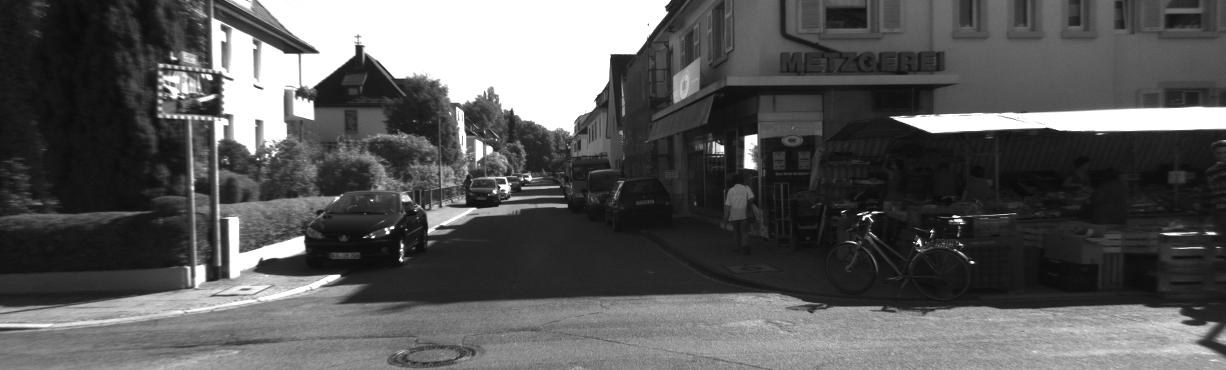

In [3]:
#Show Images
cv2_imshow(Image_left)

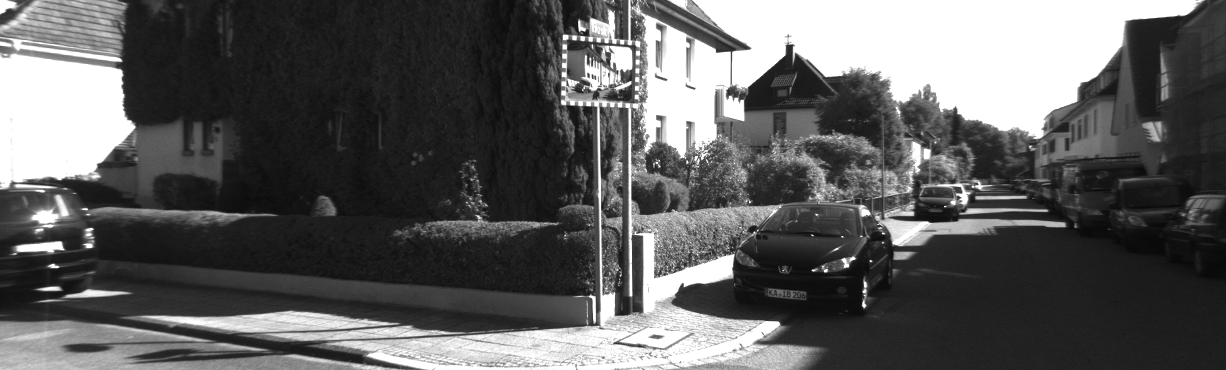

In [4]:
cv2_imshow(Image_right)

In [5]:
#Fundamental Camera Matrix
Cam_F=np.array([[3.34638533e-07, 7.58547151e-06, -2.04147752e-03],
              [-5.83765868e-06, 1.36498636e-06, 2.67566877e-04],
              [1.45892349e-03, -4.37648316e-03, 1.00000000e+00]])

In [6]:
#Create object of SIFT
sift=cv2.SIFT_create()

In [7]:
#Extract the keypoints and descriptors
kp1,des1=sift.detectAndCompute(cv2.cvtColor(Image_left, cv2.COLOR_BGR2GRAY), None)
kp2,des2=sift.detectAndCompute(cv2.cvtColor(Image_right, cv2.COLOR_BGR2GRAY), None)

In [8]:
#Find the matches
bf=cv2.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

In [9]:
#Find the good matches
good_matches=[]
for m,n in matches:
  if m.distance < 0.75 * n.distance:
    good_matches.append(m)

In [10]:
matched_points1=np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
matched_points2=np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

In [11]:
#Drwa the epipolar lines on both image
no_line = 2
for pt1,pt2 in zip(matched_points1[:no_line], matched_points2[:no_line]):
    x1,y1=pt1[0]
    x2,y2=pt2[0]
    a,b,c=np.dot(Cam_F, [x1, y1, 1])
    x0_2,y0_2=0,int(-c/b)
    x1_2,y1_2=Image_right.shape[1],int(-(c+a*Image_right.shape[1])/b)
    a,b,c=np.dot(Cam_F.T,[x2,y2,1])
    x0_1,y0_1=0,int(-c/b)
    x1_1,y1_1=Image_left.shape[1],int(-(c+a*Image_right.shape[1])/b)
    color1=tuple(np.random.randint(0, 255, 3).tolist())
    color2=tuple(np.random.randint(0, 255, 3).tolist())
    cv2.line(Image_left,(x0_1, y0_1),(x1_1, y1_1),color1,1)
    cv2.line(Image_right,(x0_2,y0_2),(x1_2, y1_2),color2,1)

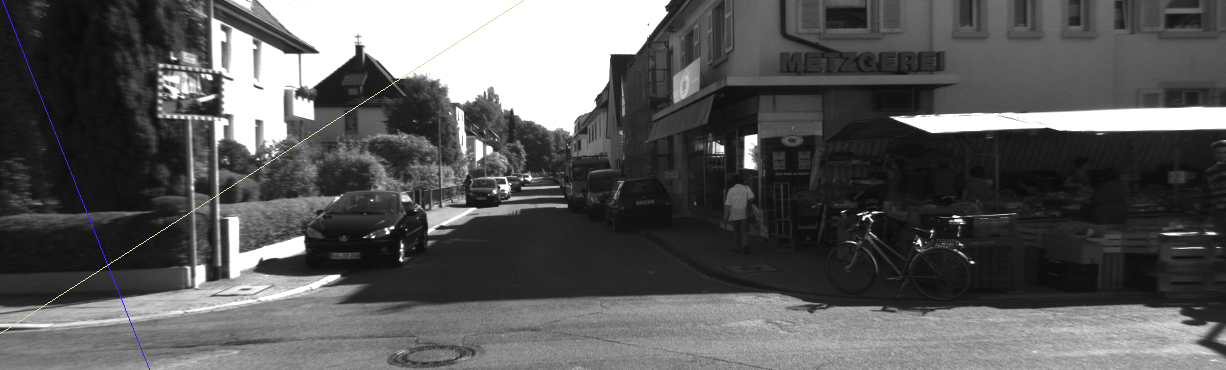

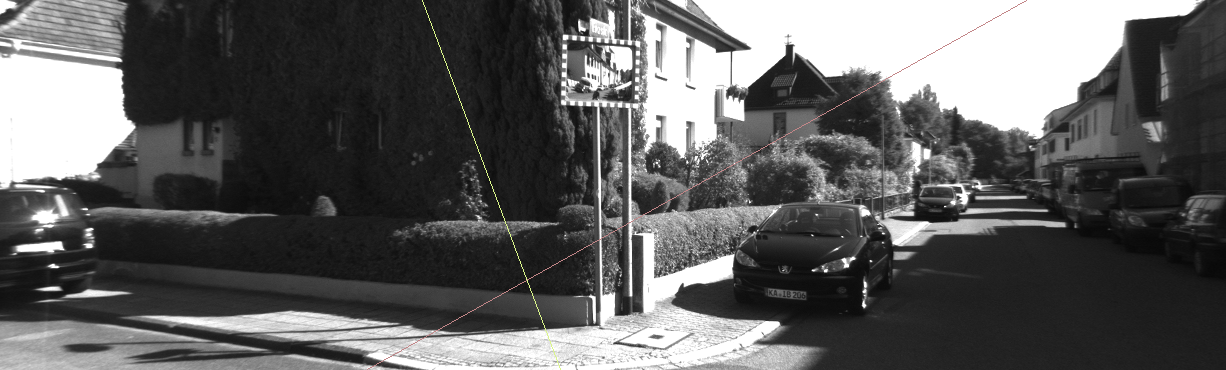

In [12]:
cv2_imshow(Image_left)
cv2_imshow(Image_right)

In [13]:
def Points_on_line(image, line, no_points):
  points=[]
  a,b,c = line
  x0,y0=map(int,[0,-c/b])
  x1,y1=map(int, [image.shape[1], -(a*image.shape[1] + c)/b])
  for i in range(no_points):
    x=x0+(x1-x0)*i/(no_points-1)
    y=y0+(y1-y0)* i/(no_points-1)
    points.append((x,y))
  return points

In [14]:
num_uniform_points=10
#Draw uniformly spaced points on the epipolar lines in both images
for pt1,pt2 in zip(matched_points1[:no_line],matched_points2[:no_line]):
  x1,y1=pt1[0]
  x2,y2=pt2[0]
  a,b,c=np.dot(Cam_F,[x1,y1,1])
  line1=np.dot(Cam_F.T,[x2,y2,1])
  uniform_points1=Points_on_line(Image_left,line1,num_uniform_points) #uniform form points on left image
  a,b,c=np.dot(Cam_F.T,[x2,y2,1])
  line2=np.dot(Cam_F,[x1, y1, 1])
  uniform_points2=Points_on_line(Image_right,line2,num_uniform_points) #uniform form points on left image
  color1=tuple(np.random.randint(0,255,3).tolist())
  color2=tuple(np.random.randint(0,255,3).tolist())
  for pt1,pt2 in zip(uniform_points1,uniform_points2):
    x1,y1=map(int,pt1)
    x2,y2=map(int,pt2)
    Image_left=cv2.circle(Image_left,(x1, y1),5,color1,-1)
    Image_right=cv2.circle(Image_right,(x2, y2),5,color2,-1)

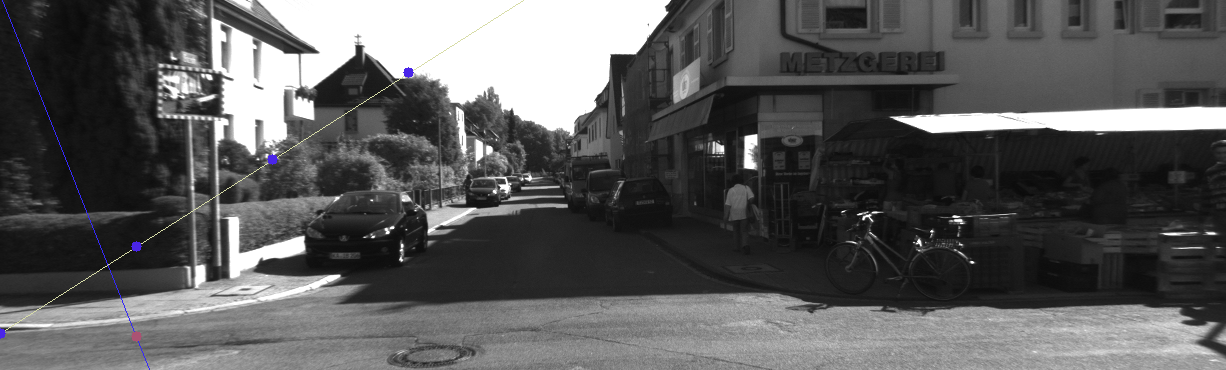

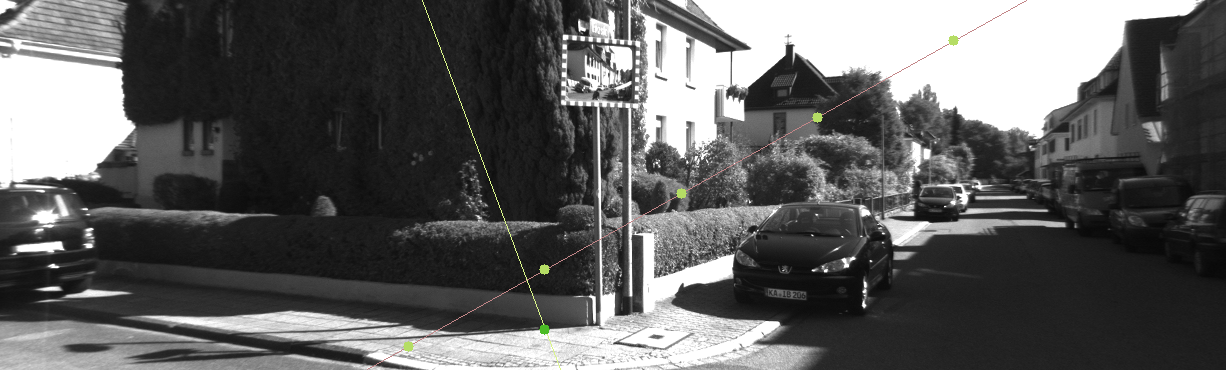

In [15]:
cv2_imshow(Image_left)
cv2_imshow(Image_right)